PCA implementation Notes
</br>The following steps where implemented for PCA.</br>
1. We read the dataset star_classification.csv -> it contains information about stars galaxies and quasars
2. We filter the dataset to only consider the first 20,000 rows.
3. The class column is the target variable (which tells if the sample is a galaxy, star, or quasar)
4. We chose 5 numerical features (the colors of the stars: "u", "g", "r", "i", "z") as the relevant data for performing PCA.
5. Calculate the mean and standard deviation for each of the features above and then standardized the data meaning we transfored the data so that it has a mean of 0 and a std of 1.Note: this step is crucial because PCA is sensitive to the scale of the data and standarizing it ensures that each feature contributes equally.
6. Compute the covariance matrix -> the covariance matrix caputres how the features (variables) of the data vary with respect to eachother. It helps to understand the relationship between the different features.
7. Eigen Decomposition -> cmputed the eigenvalues and eigenvectors of the covariance matrix . Eigen values show how much variance is capured for each PC(prinical component) and eigenvectors give the direction(the new axis ) of each component
8. sort the eigen values and eigenvectors above so we capure the pcs that capture the most variance first.
9. Select the TOP m PCS -> this reduced the data from 5 dimensions to 2
10. projected the standarized data onto the top 2 eigenvectors -> this created a new 2d dataset 
11. Calculed and explained the variance ratio for the top 2 PCs -> this tells us how much of the total variance is explained for each component -> this helps us understand how well the PCA is representing the data in fewer dimensions
12. Visualized the reudced data ->  visualized the data in 2d using scatter plot(shows how the data points are distributed in the 2d space defined by the first 2 pcs) , converted the class labels (GALAXY, QSO, STAR) into numeric values so that i could color the points into the catter plot based on their class ->



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load and preprocess the data


In [6]:
df = pd.read_csv('star_classification.csv')
df = df[0:20000]

Drop unnecessary columns


In [16]:
x = df.drop('class', axis=1)
x = x.drop("obj_ID", axis=1)
x = x.drop("spec_obj_ID", axis=1)

Extract numerical features for PCA


In [17]:
numerical_features = ["u", "g", "r", "i", "z"]
data = df[numerical_features].values

Standardize the data


In [23]:
x_mean = np.mean(data, axis=0)
x_std = np.std(data, axis=0)
x_standardized = (data - x_mean) / x_std
print("Mean of features:\n", x_mean)
print("Standard deviation of features:\n", x_std)
print("Standardized data (first 5 rows):\n", x_standardized[:5])

Mean of features:
 [22.04758134 20.60024852 19.6312533  19.08303473 18.77280883]
Standard deviation of features:
 [2.25102004 2.04119656 1.86429053 1.77423607 1.79213605]
Standardized data (first 5 rows):
 [[ 0.81351504  0.82062233  0.40967686  0.04660894  0.01166271]
 [ 1.21278737  1.09329573  1.58408073  1.17520171  1.58551644]
 [ 1.42845848  1.01099596  0.52486814  0.14966175  0.09790617]
 [ 0.03964365  1.5561027   1.06226292  0.80119286  0.2663253 ]
 [-1.15965265 -1.47950892 -1.68095222 -1.75057017 -1.80131349]]


Compute the covariance matrix


In [24]:
cov_matrix = np.cov(x_standardized, rowvar=False)
print("Covariance matrix:\n", cov_matrix)


Covariance matrix:
 [[1.00005    0.85241896 0.7278831  0.61691049 0.54560134]
 [0.85241896 1.00005    0.9305244  0.84583415 0.77284363]
 [0.7278831  0.9305244  1.00005    0.96415812 0.91903665]
 [0.61691049 0.84583415 0.96415812 1.00005    0.96917118]
 [0.54560134 0.77284363 0.91903665 0.96917118 1.00005   ]]


Perform eigen decomposition


In [25]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [4.27749049 0.58950997 0.09410692 0.02477542 0.0143672 ]
Eigenvectors:
 [[ 0.3866333   0.75335061  0.52415932 -0.09073864 -0.00102577]
 [ 0.46011856  0.28204539 -0.66381816  0.46503018  0.22767013]
 [ 0.47710726 -0.10935797 -0.27691948 -0.46693727 -0.68241826]
 [ 0.46304777 -0.34610114  0.07670383 -0.46489712  0.66617411]
 [ 0.44357753 -0.47028511  0.44948256  0.58425481 -0.196679  ]]


Sort eigenvalues and eigenvectors

In [26]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

Select the top m principal components

In [27]:
m = 2  # adjust this to select more components
top_eigenvectors = eigenvectors[:, :m]

Project the data onto the new space

In [28]:
x_pca = np.dot(x_standardized, top_eigenvectors)
print("Transformed data (first 5 rows):\n", x_pca[:5])

Transformed data (first 5 rows):
 [[ 0.91433086  0.77789717]
 [ 2.97520006 -0.10360215]
 [ 1.38061553  1.2060364 ]
 [ 1.72725913 -0.04995233]
 [-3.54072415  0.34591705]]


Explained variance ratio


In [29]:
explained_variance_ratio = eigenvalues[:m] / np.sum(eigenvalues)
print("Explained variance ratio for top components:\n", explained_variance_ratio)

Explained variance ratio for top components:
 [0.85545532 0.1178961 ]


Visualize the reduced data


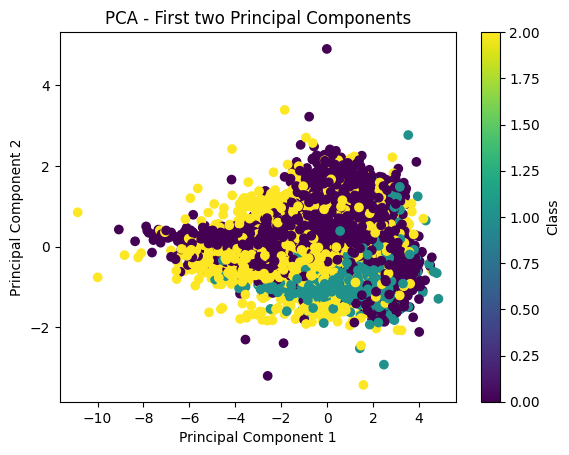

In [32]:
# Convert the 'class' column to numeric values
class_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
df['class_numeric'] = df['class'].map(class_mapping)

# 6. Plot the PCA result with the converted class values as colors
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['class_numeric'].iloc[:20000], cmap='viridis')
plt.title("PCA - First two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()
